**Ex.1**

Draw the binary tree representation of the following arithmetic expression: 

“(((5+2) ∗ (2−1))/((2+9)+((7−2)−1)) ∗ 8)”

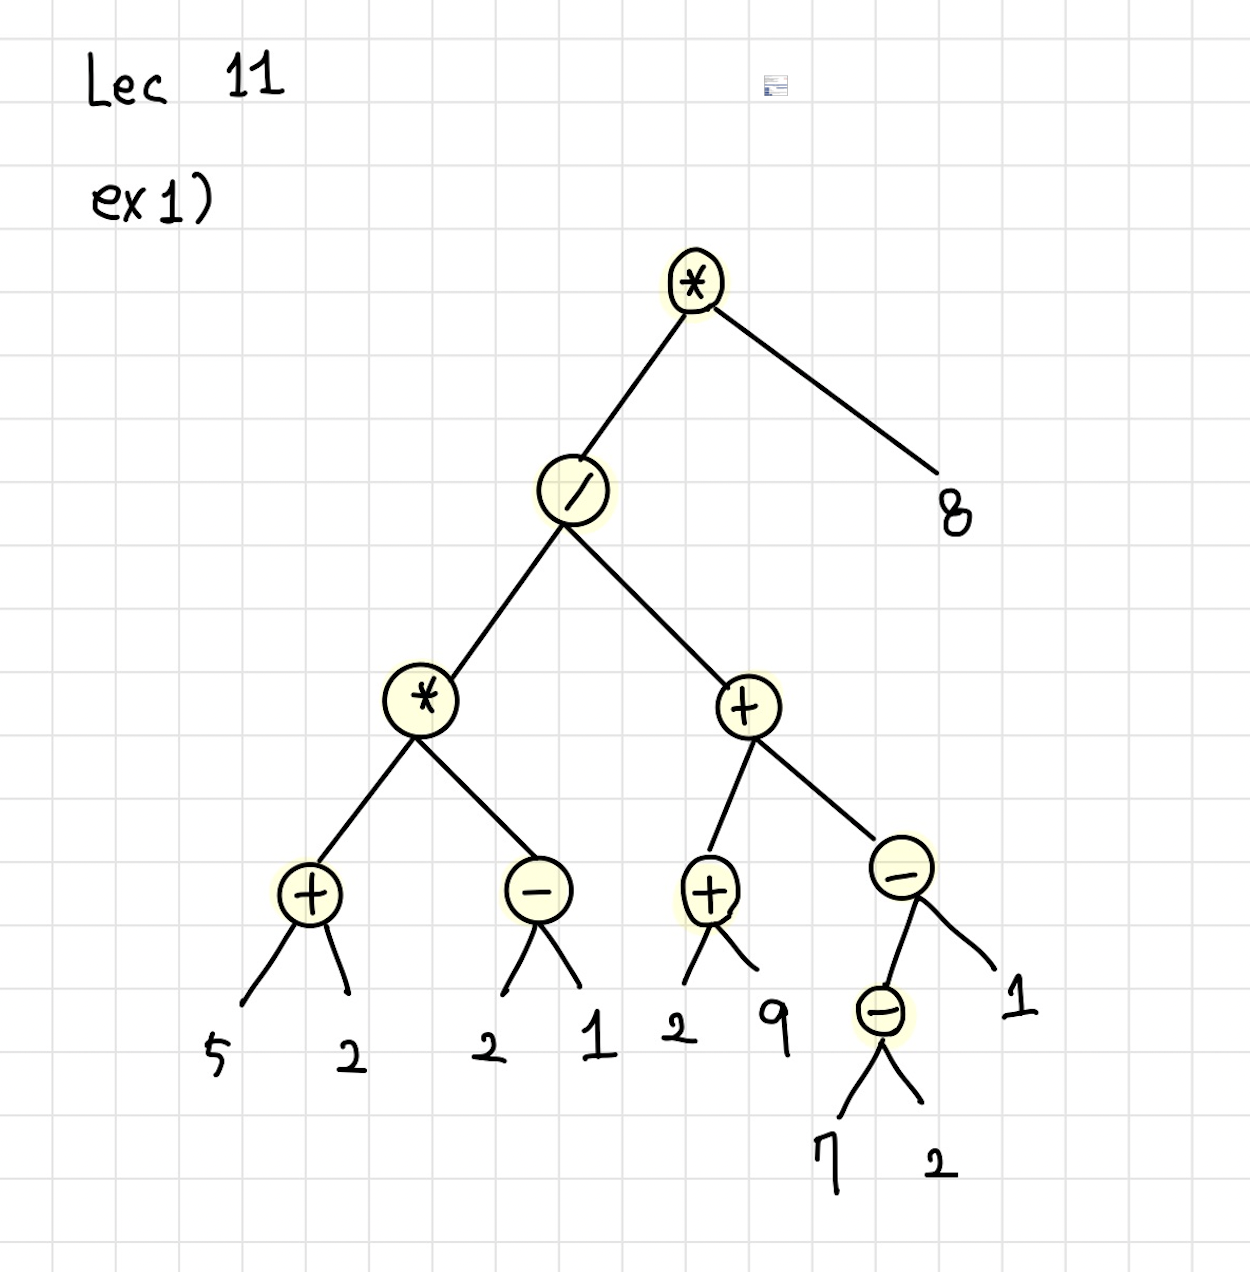

In [21]:
from IPython.display import Image
 
Image("img/Lec11_ex1.png")

**Ex.2**

Give an implementation of the ``num_children`` method within the class ``BinaryTree``.
linked

In [2]:
class Tree:
    """Abstract base class representing a tree structure."""

    #------------------------------- nested Position class -------------------------------
    class Position:
        """An abstraction representing the location of a single element."""

        def element(self):
            """Return the element stored at this Position."""
            raise NotImplementedError('must be implemented by subclass')

        def __eq__(self, other):
            """Return True if other Position represents the same location."""
            raise NotImplementedError('must be implemented by subclass')

        def __ne__(self, other):
            """Return True if other does not represent the same location."""
            return not (self == other) # opposite of eq
        
            # ---------- abstract methods that concrete subclass must support ----------
    def root(self):
        """Return Position representing the tree s root (or None if empty)."""
        raise NotImplementedError('must be implemented by subclass')

    def parent(self, p):
        """Return Position representing p s parent (or None if p is root)."""
        raise NotImplementedError('must be implemented by subclass')

    def num_children(self, p):
        """Return the number of children that Position p has."""
        raise NotImplementedError('must be implemented by subclass')

    def children(self, p):
        """Generate an iteration of Positions representing p s children."""
        raise NotImplementedError('must be implemented by subclass')

    def __len__(self):
        """Return the total number of elements in the tree."""
        raise NotImplementedError('must be implemented by subclass')
        
        # ---------- concrete methods implemented in this class ----------
    def is_root(self, p):
        """Return True if Position p represents the root of the tree."""
        return self.root() == p

    def is_leaf(self, p):
        """Return True if Position p does not have any children."""
        return self.num_children(p) == 0

    def is_empty(self):
        """Return True if the tree is empty."""
        return len(self) == 0
    



In [3]:
class BinaryTree(Tree):
    """Abstract base class representing a binary tree structure."""

    # --------------------- additional abstract methods ---------------------
    def left(self, p):
        """Return a Position representing p's left child.

        Return None if p does not have a left child.
        """
        raise NotImplementedError('must be implemented by subclass')

    def right(self, p):
        """Return a Position representing p's right child.

        Return None if p does not have a right child.
        """
        raise NotImplementedError('must be implemented by subclass')

In [4]:
    # ---------- concrete methods implemented in this class ----------
    def sibling(self, p):
        """Return a Position representing p's sibling (or None if no sibling)."""
        parent = self.parent(p) # parent 함수 명시해줘야 함
        if parent is None: # p must be the root
            return None # root has no sibling
        else:
            if p == self.left(parent):
                return self.right(parent) # possibly None
            else:
                return self.left(parent) # possibly None

    def children(self, p):
        """Generate an iteration of Positions representing p's children."""
        if self.left(p) is not None:
            yield self.left(p)
        if self.right(p) is not None:
            yield self.right(p)
            

In [5]:
class LinkedBinaryTree(BinaryTree):
    """Linked representation of a binary tree structure."""

    class _Node: # Lightweight, nonpublic class for storing a node.
        __slots__ = '_element' , '_parent' , '_left' , '_right'
        def __init__(self, element, parent=None, left=None, right=None):
            self._element = element
            self._parent = parent
            self._left = left
            self._right = right

    class Position(BinaryTree.Position):
        """An abstraction representing the location of a single element."""

        def __init__(self, container, node):
            """Constructor should not be invoked by user."""
            self._container = container
            self._node = node

        def element(self):
            """Return the element stored at this Position."""
            return self._node._element

        def __eq__(self, other):
            """Return True if other is a Position representing the same location."""
            return type(other) is type(self) and other._node is self._node
        
    
    def _validate(self, p):
        """Return associated node, if position is valid."""
        if not isinstance(p, self.Position):
            raise TypeError('p must be proper Position type')
        if p._container is not self:
            raise ValueError('p does not belong to this container')
        if p._node._parent is p._node: # convention for deprecated nodes
            raise ValueError('p is no longer valid')
        return p._node

    def _make_position(self, node):
        """Return Position instance for given node (or None if no node)."""
        return self.Position(self, node) if node is not None else None
    
    #-------------------------- binary tree constructor --------------------------
    def __init__(self):  #이건 LinkedBinaryTree를 위한거
        """Create an initially empty binary tree."""
        self._root = None
        self._size = 0
    
    #-------------------------- public accessors --------------------------
    def __len__(self): 
        """Return the total number of elements in the tree."""
        return self._size

    def root(self):
        """Return the root Position of the tree (or None if tree is empty)."""
        return self._make_position(self._root)

    def parent(self, p):
        """Return the Position of p s parent (or None if p is root)."""
        node = self._validate(p)
        return self._make_position(node._parent)

    def left(self, p):
        """Return the Position of p s left child (or None if no left child)."""
        node = self._validate(p)
        return self._make_position(node._left)
    
    def right(self, p):
        """Return the Position of p s right child (or None if no right child)."""
        node = self._validate(p)
        return self._make_position(node._right)
    
    
    def add_root(self, e):
        """Place element e at the root of an empty tree and return new Position.

        Raise ValueError if tree nonempty.
        """
        if self._root is not None: raise ValueError('Root exists')
        self._size = 1
        self._root = self._Node(e)
        return self._make_position(self._root)

    def add_left(self, p, e):
        """Create a new left child for Position p, storing element e.

        Return the Position of new node.
        Raise ValueError if Position p is invalid or p already has a left child.
        """
        node = self._validate(p)
        if node._left is not None: raise ValueError('Left child exists')
        self._size += 1
        node._left = self._Node(e, node) # node is its parent
        return self._make_position(node._left)

    def add_right(self, p, e):
        """Create a new right child for Position p, storing element e.

        Return the Position of new node.
        Raise ValueError if Position p is invalid or p already has a right child.
        """
        node = self._validate(p)
        if node._right is not None: raise ValueError('Right child exists')
        self._size += 1
        node._right = self._Node(e, node) # node is its parent
        return self._make_position(node._right)
    
    ### this is my Code ###
    def num_children(self,p):
        num = 0
        if self.right(p) != None:
            num += 1
        if self.left(p) != None:
            num += 1
        if self.right(p) and self.left(p) == None:
            num = 0
        return num

In [16]:
MyTree = LinkedBinaryTree()
root = MyTree.add_root('animal')
# root = MyTree._make_position('/')

In [17]:
L1 = MyTree.add_left(root,'mammal')
L2 = MyTree.add_left(L1,'dog')
R2 = MyTree.add_right(L1, 'cat')

In [27]:
MyTree.num_children(L2)

0

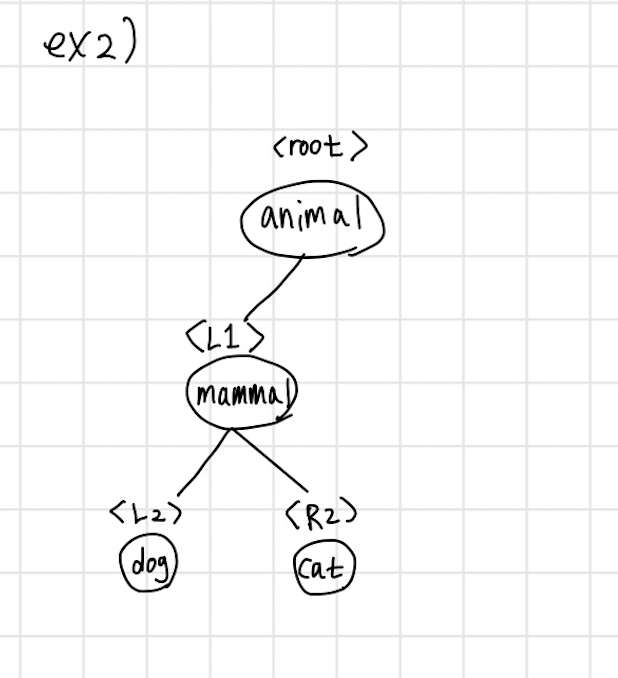

In [25]:
Image("img/algorithm-14.jpg")